<a href="https://colab.research.google.com/github/NguyenThiPhuongNhi/MayHoc_2022_2023/blob/main/Nhom4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import plotly.graph_objects as go
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as m

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/GK_ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/GK_ML


In [5]:
df = pd.read_csv("BankNoteAuthentication.csv")
df.info() #kiểm tra thông tin của dataset
# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df['class_desc'] = np.where(df['class']==1, 'Fake', 'Authentic')
df
# thêm cột 
# chuyển từ dữ liệu số sang chuỗi
#  1: Fake 
#  0: Authentic

,variance,skewness,curtosis,entropy,class,class_desc
0,3.62160,8.66610,-2.8073,-0.44699,0,Authentic
1,4.54590,8.16740,-2.4586,-1.46210,0,Authentic
2,3.86600,-2.63830,1.9242,0.10645,0,Authentic
3,3.45660,9.52280,-4.0112,-3.59440,0,Authentic
4,0.32924,-4.45520,4.5718,-0.98880,0,Authentic
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,Fake
1368,-1.38870,-4.87730,6.4774,0.34179,1,Fake
1369,-3.75030,-13.45860,17.5932,-2.77710,1,Fake
1370,-3.56370,-8.38270,12.3930,-1.28230,1,Fake


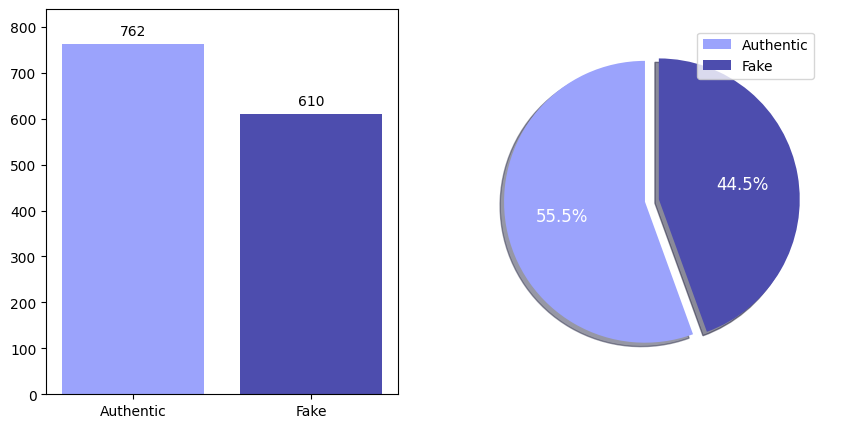

In [ ]:
# biểu đồ thể hiện phân bố của cột y
# kết luận phân bố dữ liệu khá cân bằng
value_count =  df['class_desc'].value_counts()
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=2)
ax[0].bar(value_count.index, 
        height = value_count.values,
        color=['#9BA3FC', '#4D4DAE'])
ax[0].bar_label(ax[0].containers[0], padding=4)
ax[0].margins(y=0.1)

ax[1].pie(value_count.values / np.sum(value_count.values),
          autopct = lambda x: '{:.1f}%'.format(x),
          labels = value_count.index,
          shadow = True,
          colors=['#9BA3FC', '#4D4DAE'], 
          textprops = dict(color ="white", size="large"),
          startangle = 90,
          explode=[0, 0.1])
                                
ax[1].legend()

fig.show()

In [ ]:
# # 
# fig = go.Figure(go.Scatter3d(x=df.variance, y=df.skewness, z=df.curtosis,
#                              text='</br><b>Class: ' + df['class'].astype(str) + ' (' + df['class_desc']+  ')' '</b>',
#                              mode='markers',
#                              marker=dict(size=4, color=np.where(df['class']==1, '#8b5aed', '#000428')),
#                              showlegend=False
#                             ))


# fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
#                         marker=dict(size=25, color='#000428'),
#                         showlegend=True, name='Class 0 (Authentic)', legendgroup='1'))

# fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
#                         marker=dict(size=25, color='#8b5aed'),
#                         showlegend=True, name='Class 1 (Fake)', legendgroup='2'))


# fig.update_layout(legend=dict(yanchor="top", y=0.5))

# fig.update_layout(height=600, width=800, margin=dict(t=0, b=0, l=0, r=0),
#                   scene = dict(
#                       xaxis_title='variance',
#                       yaxis_title='skewness',
#                       zaxis_title='curtosis'))

# fig.show()

In [7]:
x= df.drop(columns=["class","class_desc"])
y= df['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print('Dữ liệu sau khi chia')
print('X test shape:', X_test.shape)
print('X train shape:', X_train.shape)

Dữ liệu sau khi chia
X test shape: (412, 4)
X train shape: (960, 4)


In [19]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1']

In [ ]:
# GridSearchCV vs Neural network
grid_params = {
'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
 'max_iter': [50, 100, 150],
 'activation': ['tanh', 'relu'],
 'solver': ['sgd', 'adam'],
 'alpha': [0.0001, 0.05],
 'learning_rate': ['constant','adaptive']}

clf_class = MLPClassifier()
grid_Class = GridSearchCV(clf_class, grid_params, n_jobs= -1, cv=5)
grid_Class.fit(X_train, y_train)
print(grid_Class.best_params_)


{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



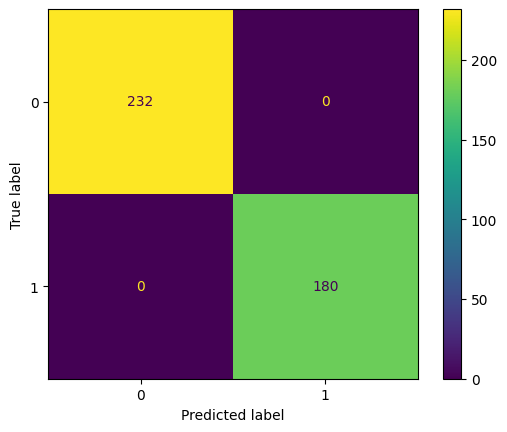

In [16]:
# Neural network
clf = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (150, 100, 50), learning_rate = 'adaptive', max_iter = 150, solver = 'adam' )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),4)
precision = round(precision_score(y_test, y_pred),4)
recall = round(recall_score(y_test, y_pred),4)
f1 = round(f1_score(y_test, y_pred),4)

arr_neural = [accuracy,precision, recall, f1]

print(classification_report(y_test, y_pred))
print(m.ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


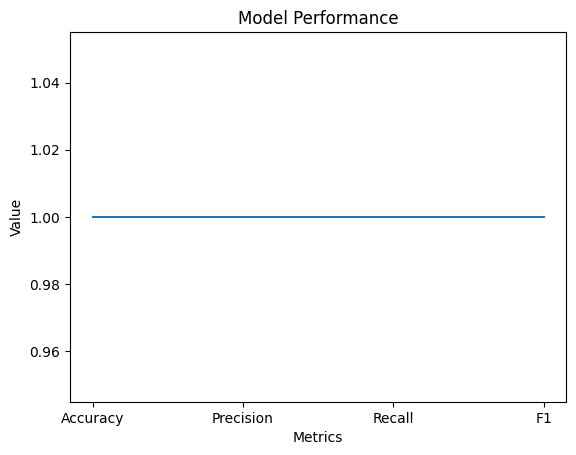

In [20]:
# Neural network
plt.plot(labels, arr_neural)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance')

plt.show()

In [ ]:
# GridSearchCV vs kNN
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
kNN_class = KNeighborsClassifier()
grid_Class = GridSearchCV(scoring = 'accuracy' ,estimator=kNN_class, n_jobs = -1, param_grid=grid_params, refit = True)

grid_Class.fit(X_train, y_train)
print(grid_Class.best_params_)


{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



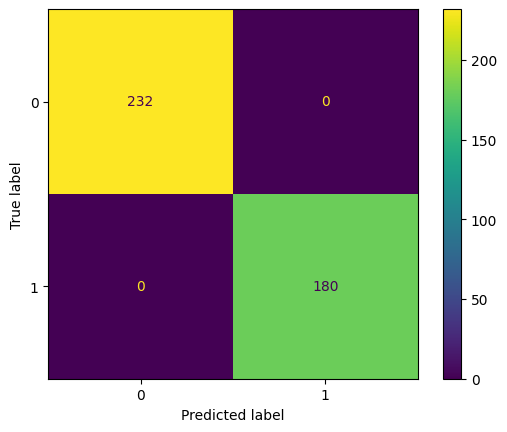

In [21]:
# kNN
knn = KNeighborsClassifier(metric='minkowski', n_neighbors= 5, weights= 'uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),4)
precision = round(precision_score(y_test, y_pred),4)
recall = (recall_score(y_test, y_pred))
f1 = round(f1_score(y_test, y_pred),4)

arr_kNN = [accuracy, precision, recall, f1]

print(classification_report(y_test, y_pred))
print(m.ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


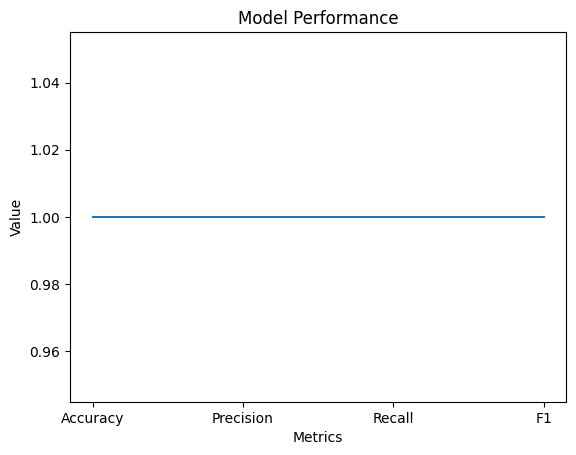

In [23]:
# kNN
plt.plot(labels, arr_kNN)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance')

plt.show()

In [ ]:
# GridSearchCV vs Bayes
grid_params = { 'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.2, 0.3, 0.5], [0.1, 0.4, 0.5]],}


bayes_class = GaussianNB()
grid_Class = GridSearchCV(estimator=bayes_class, n_jobs = -1, param_grid=grid_params, refit = True, cv =5)

grid_Class.fit(X_train, y_train)
print(grid_Class.best_params_)


{'priors': None, 'var_smoothing': 1e-09}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 454, in _partial_fit
    raise ValueError("Number of priors must match number of classes.")
ValueError: Number of prio

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       232
           1       0.81      0.80      0.81       180

    accuracy                           0.83       412
   macro avg       0.83      0.83      0.83       412
weighted avg       0.83      0.83      0.83       412



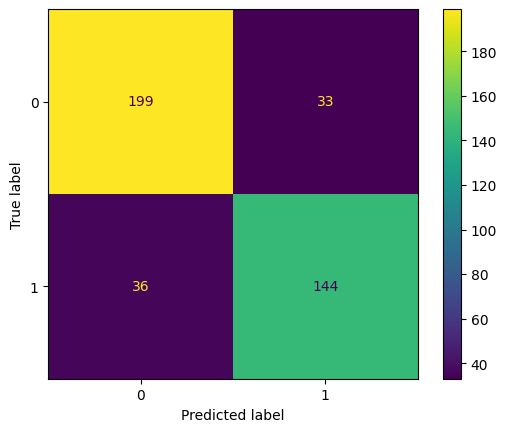

In [24]:
# Bayes
bayes = GaussianNB(priors = None, var_smoothing = 1e-09)
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),4)
precision = round(precision_score(y_test, y_pred),4)
recall = round(recall_score(y_test, y_pred),4)
f1 = round(f1_score(y_test, y_pred),4)

arr_bayes = [accuracy, precision, recall, f1]

print(classification_report(y_test, y_pred))
print(m.ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


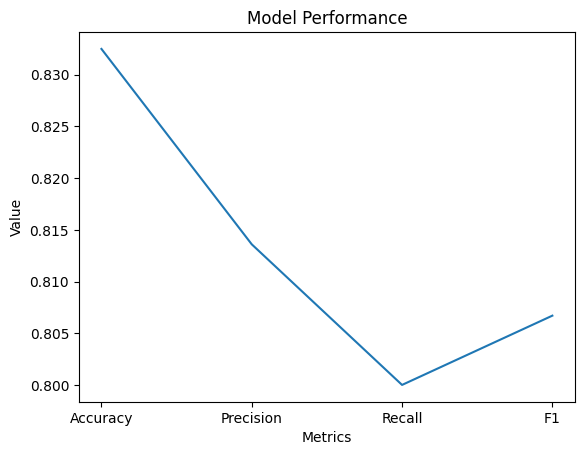

In [25]:
# Bayes
plt.plot(labels, arr_bayes)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance')

plt.show()

In [ ]:
# GridSearchCV vs Random forest
grid_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_class = RandomForestClassifier()
grid_Class = GridSearchCV(scoring = 'accuracy' ,estimator=rf_class, n_jobs = -1, param_grid=grid_params, refit = True)

grid_Class.fit(X_train, y_train)
print(grid_Class.best_params_)


{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2'}


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



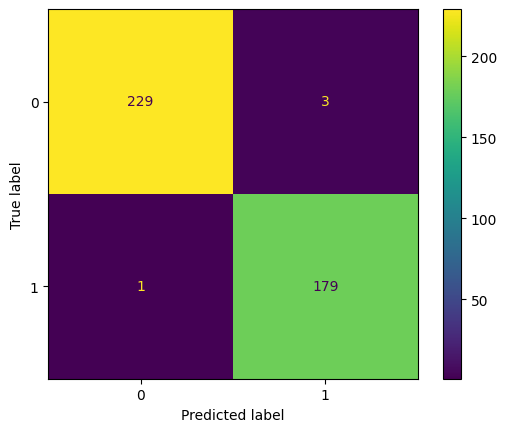

In [26]:
# Random forest
rf=RandomForestClassifier(class_weight = 'balanced_subsample', criterion = 'gini', max_features ='sqrt')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),4)
precision = round(precision_score(y_test, y_pred),4)
recall = round(recall_score(y_test, y_pred),4)
f1 = round(f1_score(y_test, y_pred),4)

arr_rf = [accuracy, precision, recall, f1]

print(classification_report(y_test, y_pred))
print(m.ConfusionMatrixDisplay.from_predictions(y_test,y_pred))



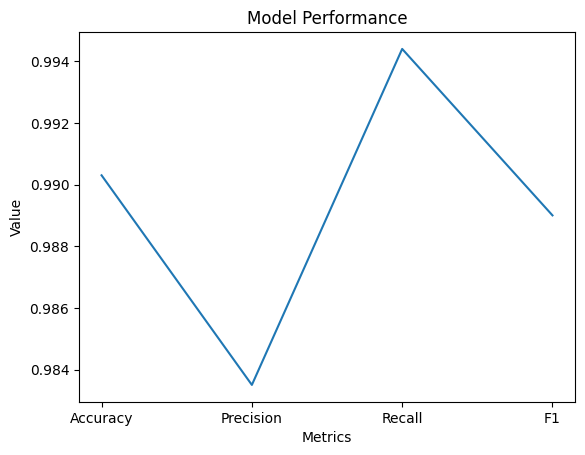

In [27]:
# Random forest
plt.plot(labels, arr_rf)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance')

plt.show()

In [ ]:
# GridSearchCV vs Decision tree
grid_params = {'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    
}

dt_class = DecisionTreeClassifier()
grid_Class = GridSearchCV(scoring = 'accuracy' ,estimator=dt_class, n_jobs = -1, param_grid=grid_params, refit = True)

grid_Class.fit(X_train, y_train)
print(grid_Class.best_params_)


{'criterion': 'entropy', 'max_features': 'sqrt'}


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       232
           1       0.97      0.96      0.97       180

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



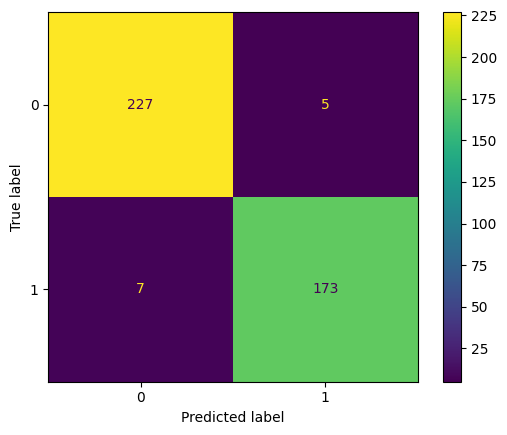

In [28]:
# Decision tree
dt = DecisionTreeClassifier(criterion = 'gini', max_features = 'sqrt')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),4)
precision = round(precision_score(y_test, y_pred),4)
recall = round(recall_score(y_test, y_pred),4)
f1 = round(f1_score(y_test, y_pred),4)

arr_dt = [accuracy, precision, recall, f1]

print(m.ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test, y_pred))


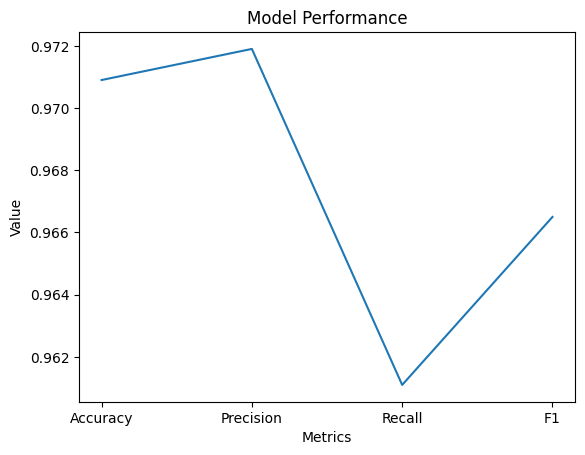

In [29]:
# Decision Tree
plt.plot(labels, arr_dt)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance')

plt.show()

In [ ]:
data={'Neural network': arr_neural,
      'kNN': arr_kNN,
      'Bayes': arr_bayes,
      'Random Forest': arr_rf,
      'Decision Tree': arr_dt}
row_labels = ['accuracy', 'precision','recall', 'f1']

dframe = pd.DataFrame(data=data,index = row_labels)
dframe

,Neural network,kNN,Bayes,Random Forest,Decision Tree
accuracy,1.0,1.0,0.8325,0.9903,0.9854
precision,1.0,1.0,0.8136,0.9835,0.9728
recall,1.0,1.0,0.8000,0.9944,0.9944
f1,1.0,1.0,0.8067,0.9890,0.9835
